                 333            444
count  460287.000000  460287.000000
mean        4.234919       3.210601
std         1.430718     183.506791
min         1.000000       0.000000
25%         4.000000       0.000000
50%         5.000000       0.000000
75%         5.000000       0.000000
max         5.000000   40311.000000


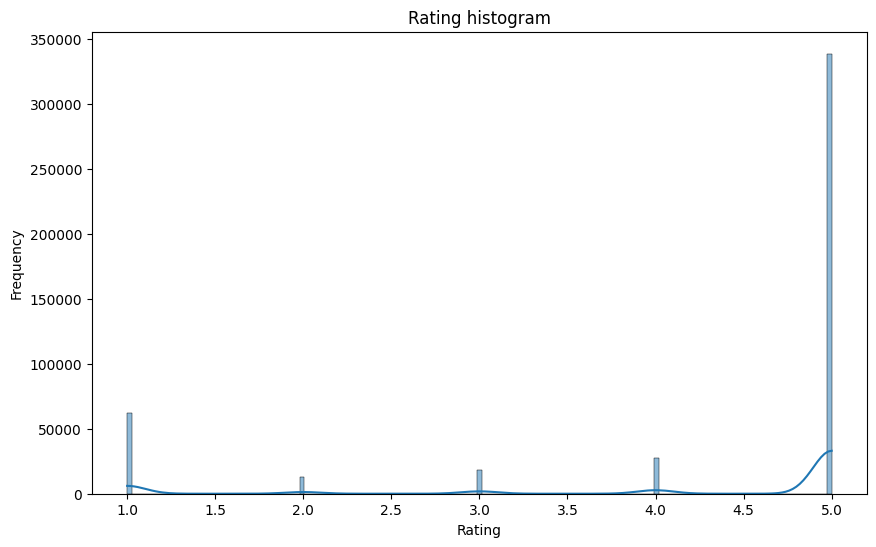

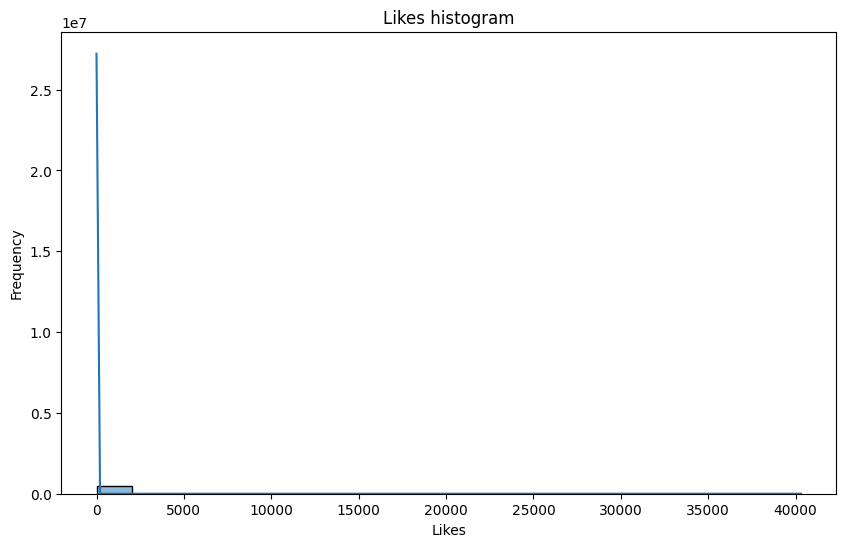

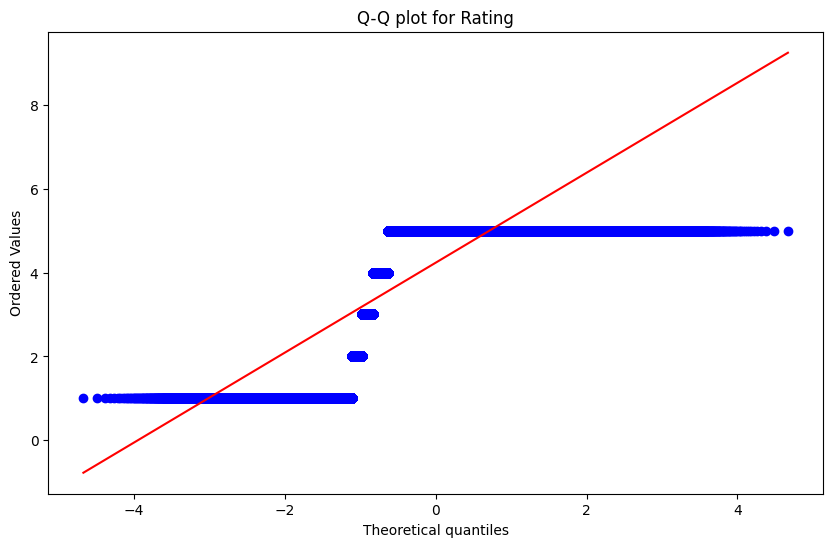

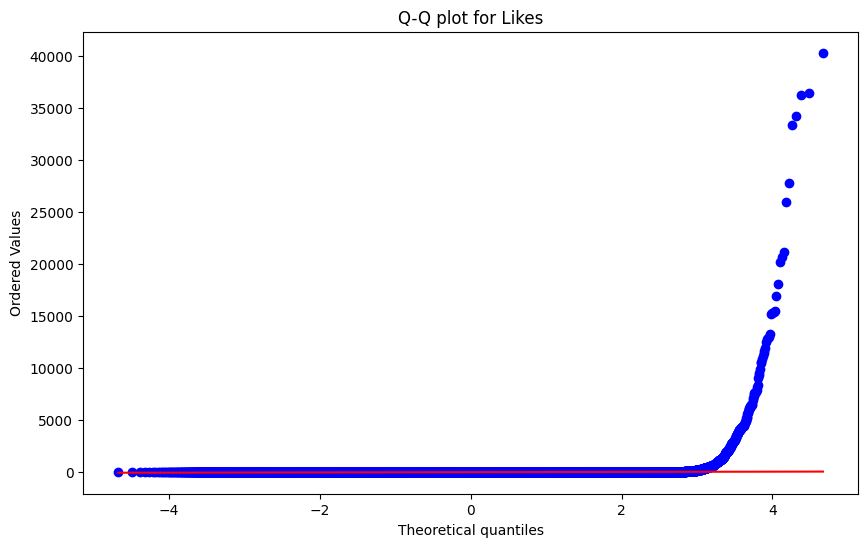

Shapiro-Wilk 检验 - 评分: 统计量=0.5673510432243347, p值=0.0000000000e+00
Shapiro-Wilk 检验 - 点赞数: 统计量=0.004110276699066162, p值=0.0000000000e+00
Normaltest 检验 - 评分: 统计量=108228.24956527277, p值=0.0000000000e+00
Normaltest 检验 - 点赞数: 统计量=1976226.0384680105, p值=0.0000000000e+00
Anderson-Darling 检验 - 评分: 统计量=97191.11235841224, 临界值=[0.576 0.656 0.787 0.918 1.092], 答案解释=[15.  10.   5.   2.5  1. ]
Anderson-Darling 检验 - 点赞数: 统计量=176127.97528070188, 临界值=[0.576 0.656 0.787 0.918 1.092], 答案解释=[15.  10.   5.   2.5  1. ]


/root/miniconda3/envs/IDMS/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [4]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import shapiro

# # 加载数据
# file_path = "./douyin.csv"
# data = pd.read_csv(file_path)
# # 绘制评分直方图
# plt.figure(figsize=(10, 6))
# sns.histplot(data['333'], kde=True)
# plt.title('Rating histogram')
# plt.xlabel('Rating')
# plt.ylabel('Frequency')
# plt.show()
# # 绘制点赞数直方图
# plt.figure(figsize=(10, 6))
# sns.histplot(data['444'], kde=True)
# plt.title('Likes histogram')
# plt.xlabel('Likes')
# plt.ylabel('Frequency')
# plt.show()

# # 进行正态性检验
# score_stat, score_p = shapiro(data['333'])
# likes_stat, likes_p = shapiro(data['444'])

# print(f"评分的Shapiro-Wilk检验结果: 统计量={score_stat}, p值={score_p:.10f}")
# print(f"点赞数的Shapiro-Wilk检验结果: 统计量={likes_stat}, p值={likes_p:.10f}")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot, normaltest, anderson

# 加载数据
file_path = "./douyin.csv"
data = pd.read_csv(file_path)

# 打印数据描述性统计信息
print(data.describe())

# 绘制评分直方图
plt.figure(figsize=(10, 6))
sns.histplot(data['333'], kde=True)
plt.title('Rating histogram')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# 绘制点赞数直方图
plt.figure(figsize=(10, 6))
sns.histplot(data['444'], kde=True)
plt.title('Likes histogram')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()

# 绘制评分 Q-Q 图
plt.figure(figsize=(10, 6))
probplot(data['333'], dist="norm", plot=plt)
plt.title('Q-Q plot for Rating')
plt.show()

# 绘制点赞数 Q-Q 图
plt.figure(figsize=(10, 6))
probplot(data['444'], dist="norm", plot=plt)
plt.title('Q-Q plot for Likes')
plt.show()

# 进行正态性检验
score_stat, score_p = shapiro(data['333'])
likes_stat, likes_p = shapiro(data['444'])
print(f"Shapiro-Wilk 检验 - 评分: 统计量={score_stat}, p值={score_p:.10e}")
print(f"Shapiro-Wilk 检验 - 点赞数: 统计量={likes_stat}, p值={likes_p:.10e}")

# 使用其他正态性检验方法
score_ks_stat, score_ks_p = normaltest(data['333'])
likes_ks_stat, likes_ks_p = normaltest(data['444'])
print(f"Normaltest 检验 - 评分: 统计量={score_ks_stat}, p值={score_ks_p:.10e}")
print(f"Normaltest 检验 - 点赞数: 统计量={likes_ks_stat}, p值={likes_ks_p:.10e}")

score_anderson = anderson(data['333'])
likes_anderson = anderson(data['444'])
print(f"Anderson-Darling 检验 - 评分: 统计量={score_anderson.statistic}, 临界值={score_anderson.critical_values}, 答案解释={score_anderson.significance_level}")
print(f"Anderson-Darling 检验 - 点赞数: 统计量={likes_anderson.statistic}, 临界值={likes_anderson.critical_values}, 答案解释={likes_anderson.significance_level}")



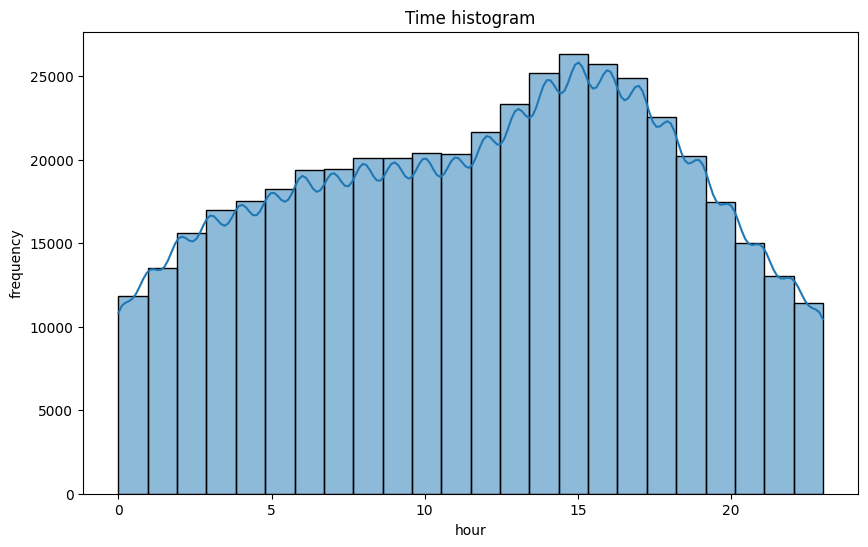

评分最高的版本: 11.5.2
点赞数最多的版本: 24.9.3


In [2]:
# 转换评论时间为日期时间格式
data['666'] = pd.to_datetime(data['666'])

# 提取小时
data['hour'] = data['666'].dt.hour

# 绘制评论时间分布直方图
plt.figure(figsize=(10, 6))
sns.histplot(data['hour'], bins=24, kde=True)
plt.title('Time histogram')
plt.xlabel('hour')
plt.ylabel('frequency')
plt.show()

# 最高评分版本
highest_score_version = data.groupby('555')['333'].mean().idxmax()

# 最多点赞数版本
most_likes_version = data.groupby('555')['444'].sum().idxmax()

print(f"评分最高的版本: {highest_score_version}")
print(f"点赞数最多的版本: {most_likes_version}")
